# REAL RACING 3 VEHICLES - DATA ANALYSIS

# PART 2 - Revision 3

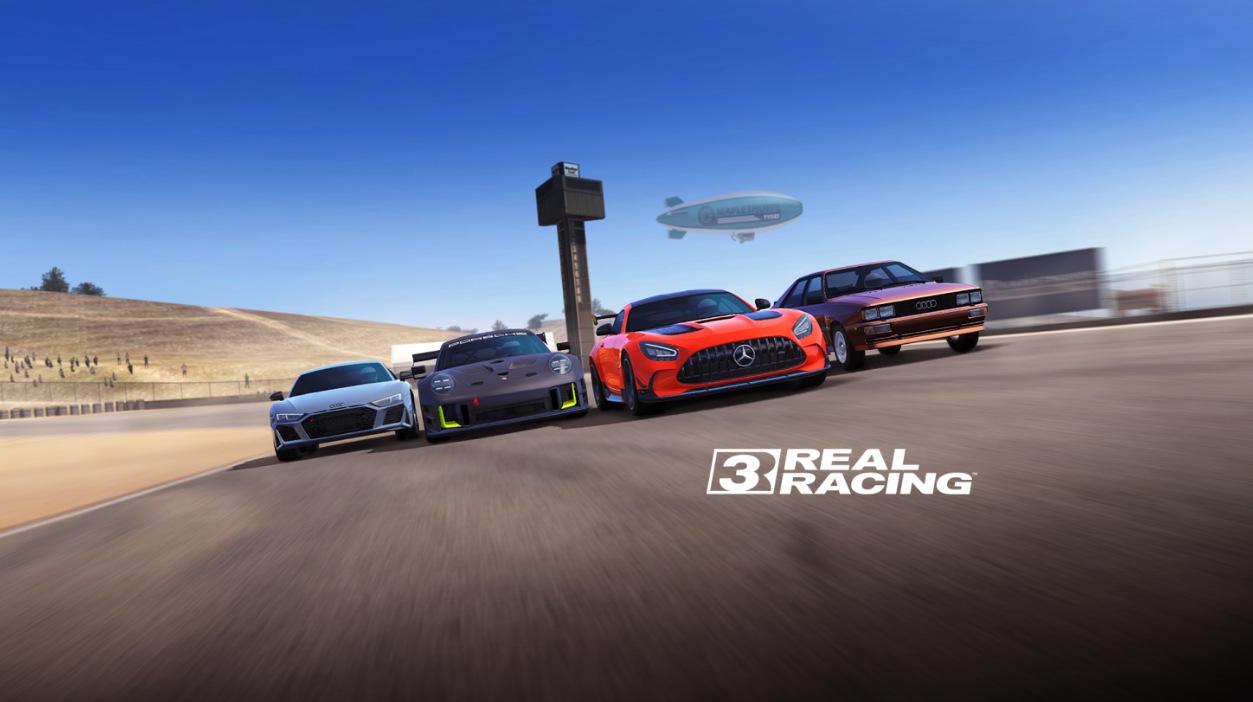

### **Welcome to my 2nd part of data analyses for Real Racing 3 Vehicles!**

_This is the 3rd revision of 2nd part for up-to-date analyses with **game version 11.0**._

As always, let's import all necessary modules and load our vehicle dataset first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v11_0.csv')

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Before the start, let me check the first and last few lines of the vehicle dataset...

In [4]:
rr3_df.head(7)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,1,450 Gold,180,1665,Yes,No,No,Yes
1,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,No,No
2,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,No,No
3,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,No
4,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415,Yes,No,No,Yes
5,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes
6,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes


In [5]:
rr3_df.tail(7)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
453,Toyota,Camry (Joe Gibbs Racing - 2021),45.4,298,3.45,29.3,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
454,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
455,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,Yes,No,No,No
456,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No
457,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,1,300 Gold,180,1377,Yes,No,No,Yes
458,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,1,350 Gold,180,1415,Yes,No,No,Yes
459,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes


All right, everything looks perfect! I assure that there seems to be no problem here.

**Let's remind ourselves for what I did in the 1st part:** Many data analyses have been performed such as _selecting some vehicles one by one,_ _finding the minimum and maximum values w.r.t. their characteristics,_ _discussions on servicing time,_ etc. 

_**OK, I would like to continue for more advanced analysis in order to gain more insights...**_

**First of all**, let's learn how many **manufacturers take part** currently in version 11.0 of Real Racing 3:

In [6]:
len(rr3_df['Manufacturer'].value_counts())

45

Whoa! **45 manufacturers**, eh? There are lots of them than I expected, to be honest! Well, however, before inspecting the manufacturer names, I think there are **at least one or two** of them that do not seem to be counted as car manufacturers at all. Let me investigate the unique names now:

In [7]:
rr3_df['Manufacturer'].unique()

array(['Acura', 'Alfa Romeo', 'Apollo', 'Ariel', 'Aston Martin', 'Audi',
       'Bentley', 'BMW', 'Brabham', 'Bugatti', 'Cadillac', 'Caterham',
       'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Formula 1', 'Formula E',
       'Hennessey', 'Holden', 'Honda', 'Hyundai', 'Jaguar', 'Koenigsegg',
       'KTM', 'Lamborghini', 'Lancia', 'Lexus', 'Lotus', 'Maserati',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercedes-AMG',
       'Mitsubishi Motors', 'Nissan', 'Pagani', 'Porsche', 'Renault',
       'Shelby', 'Spada', 'SRT', 'Subaru', 'Toyota', 'Volkswagen'],
      dtype=object)

Ah yes! As you see from the manufacturer names above, **Formula 1** and **Formula E** should not be classified as individual manufacturers! Of course, in order to not disorganize these related vehicles, they were all branded under their motorsport discipline.

Also, if you've ever played the game and inspected the vehicles from **garage menu**, you realized that **the game grouped them together** intentionally. 

Moreover, **Mercedes-Benz** and **Mercedes-AMG** have been appeared to be **two different manufacturers**! Despite this distinction, should we consider them as **one whole** manufacturer? Yeah, we think so...

In [8]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)

And below, these are the **Mercedes vehicles** (ending with _Benz_ or _AMG_, no matter) available to drive in the game:

In [9]:
mercedes = rr3_df[rr3_df['Manufacturer'] == 'Mercedes'].reset_index()
mercedes.set_index(pd.Index(list(range(1,len(mercedes)+1))), inplace=True)
print("There are total of {} Mercedes vehicles available to drive in Real Racing 3 (v11.0)".format(len(mercedes)))
mercedes.loc[:, ['Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Class', 'Price', 
                 'Service Cost', 'Service Time', 'Has Exclusive Events', 'In Main Career']]

There are total of 14 Mercedes vehicles available to drive in Real Racing 3 (v11.0)


,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Price,Service Cost,Service Time,Has Exclusive Events,In Main Career
1,190E 2.5-16 Evolution II,3.5,249,6.90,41.5,1.09,P,80 Gold,980,105,Yes,No
2,A 45,30.5,249,4.20,32.3,1.10,P,200 Gold,1082,120,No,No
3,SLS AMG,37.1,317,3.80,30.5,0.98,S,260000 Rdollar,1177,140,No,Yes
4,SL 65 AMG Black Series,38.3,319,3.80,32.0,1.00,S,316000 Rdollar,1247,150,No,Yes
5,SLS AMG GT3,43.0,299,3.50,30.5,1.09,R,140 Gold,1415,180,No,Yes
6,C63S,33.3,290,3.80,35.1,1.03,R,375 Gold,1480,120,No,No
7,SLR McLaren 722,48.6,338,3.50,29.3,1.13,S,450 Gold,1585,180,Yes,No
8,GT3,60.2,328,3.00,27.4,1.30,R,650 Gold,1665,180,Yes,No
9,CLK-LM,56.0,360,3.40,30.5,1.30,R,640 Gold,1665,180,Yes,No
10,AMG CLK GTR Straßenversion,42.3,344,3.67,35.4,1.14,S,650 Gold,1665,180,No,No


Yep, this should do the trick! With these discussions in mind; that is, excluding Formula 1, Formula E and considering Mercedes as whole, **we now actually have 42 different manufacturers**, still a lot and nice for a racing game that gets updates regularly...

At this point, we should be aware that some manufacturers are represented with **just one vehicle**, while some are represented by having already **lost of vehicles** in the roster!

So, the first question is which manufacturers are represented with **at least 10 vehicles**?

_For the proper result, again Formula 1 and Formula E are ignored at all..._

In [10]:
manuCounts = rr3_df['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts[manuCounts >= 10]

Porsche         51
Chevrolet       34
Ferrari         29
Nissan          26
Ford            26
Lamborghini     22
BMW             20
Aston Martin    18
McLaren         17
Audi            14
Mercedes        14
Toyota          11
Name: Manufacturer, dtype: int64

From this outcome above, Real Racing 3 still favors **Porsche** the most! Up until version 11.0, with **over 50 vehicles**!

Then these manufacturers come after: _Chevrolet,_ _Ferrari,_ _Nissan,_ _Ford,_ _Lamborghini,_ _BMW,_ _Aston Martin,_ _McLaren,_ _Audi,_ _Mercedes_ and _Toyota_.

Note that _Chevrolet,_ _Ferrari,_ _Nissan_ and _Toyota_ have **many vehicles discontinued** due to especially limited-time purchase period of vehicles from **NASCAR** (spreaded to several seasons) and previously from **Supercar Series**.

With the latest update, where **Ferrari Daytona SP3**, **Lamborghini Reventon**, **Mercedes-Benz AMG CLK GTR Straßenversion** and **Porsche 911 GT1 Straßenversion** were added, _Ferrari_ now has 29 vehicles in total, placing **3rd** and _Lamborghini_ has reached 22, but staying in the **6th** place. At the same time, _Mercedes_ with the combination of 'Benz' and 'AMG' contains 14 vehicles (also seen in the table above), sharing **10th** place with _Audi_.

Now in contrast, **I'd like to see the names of manufacturers only having one vehicle in the game:**

In [11]:
manu_one_vehicle = (rr3_df['Manufacturer'].value_counts() == 1).values
print(rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle])

['Mitsubishi Motors' 'Caterham' 'KTM' 'Brabham' 'SRT' 'Subaru' 'Apollo'
 'Lancia']


All right, there appears to be **8 manufacturers with only one vehicle** available for purchase! Well, what are the details about these vehicles?

In [12]:
manu_names_one_v = rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle]
manu_values = rr3_df['Manufacturer'].values
manu_names_one_v_indexes = []
for i in range(manu_values.size):
    if manu_values[i] in manu_names_one_v:
        manu_names_one_v_indexes.append(i)
rr3_df.loc[manu_names_one_v_indexes, :]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
6,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes
65,Brabham,BT62,68.9,319,2.88,27.4,1.55,R,MR,2,800 Gold,180,1997,Yes,Yes,No,Yes
76,Caterham,Seven 620 R,49.1,249,2.70,32.0,1.18,S,FR(RHD),2,378500 Rdollar,165,1312,Yes,No,Yes,No
285,KTM,X-Bow R,46.6,232,3.80,32.0,1.50,S,RR,3,115 Gold,150,1247,Yes,No,Yes,No
308,Lancia,LC2,82.5,385,2.80,28.3,1.80,R,MR,1,900 Gold,180,1997,Yes,No,No,No
354,Mitsubishi Motors,Lancer Evolution VI,5.3,238,5.00,39.0,0.98,P,F4,1,300 Gold,180,1415,Yes,No,No,No
444,SRT,Viper GTS,42.4,332,3.50,32.3,1.06,S,FR,3,176000 Rdollar,115,1037,Yes,No,Yes,No
445,Subaru,Impreza 22B-STI Version,5.4,229,4.90,38.1,0.99,P,F4,1,300 Gold,180,1415,Yes,No,No,No


**There they are!** As you can see above, we realize that _Caterham Seven 620 R,_ _SRT Viper GTS,_ and _KTM X-Bow R_ appear within the main career series at reasonable prices. The rest are obtainable with Gold only, ranging from **300 to 1100**!

At this point, it is great to see **Mitsubishi** and **Subaru** have made it to the game! I have to admit that I've been waiting for these two Japanese manufacturers for years and their first appearances came with models where they became rally legends from late 90s: The **Lancer Evo VI** and **Impreza 22B-STI**.

Plus, **Apollo Intensa Emozione** is another addition, especially during Season 1; but as seen from its stats above, this vehicle is actually a **hypercar**, so its price is so high as expected.

As we stated above, this game has **several vehicles discontinued** for sale! Now is the time to reveal the list...

In [13]:
not_available = rr3_df[rr3_df['Is Available'] == 'No']
print("Total of {} vehicles have been discontinued in Real Racing 3:".format(len(not_available)))
not_available.loc[:, ['Manufacturer', 'Model', 'PR', 'Class', 'Series', 'Price']]

Total of 45 vehicles have been discontinued in Real Racing 3:


,Manufacturer,Model,PR,Class,Series,Price
81,Chevrolet,SS (NASCAR Academy),25.6,R,1,200000 Rdollar
93,Chevrolet,SS (Hendrick Motorsports - 2015),44.1,S,1,500 Gold
94,Chevrolet,SS (Stewart-Haas Racing - 2015),44.1,S,1,500 Gold
95,Chevrolet,SS (Stewart-Haas Racing - 2016),44.2,S,1,500 Gold
96,Chevrolet,SS (Hendrick Motorsports - 2016),44.2,S,1,500 Gold
97,Chevrolet,SS (Hendrick Motorsports - 2017),43.5,S,1,500 Gold
98,Chevrolet,Camaro ZL1 (2018),43.8,R,1,500 Gold
99,Chevrolet,Camaro ZL1 (2019),45.7,R,2,500 Gold
100,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),43.8,R,1,2150000 Mdollar
101,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),43.8,R,1,2150000 Mdollar


That's a long list! My knowledge did not prove me wrong. These all are either from **NASCAR** or **Supercars** series!

About the details, _Ford Falcon FG X,_ _Holden Commodore VF,_ _Nissan Altima,_ all ranging from **2016 to 2018 models**, were there under **Supercars** series. And the others, you know, are from **NASCAR**. Due to limited licensing to these vehicles within the game, newcomers can no longer access them! But, you should consider yourself lucky if you already purchased at least one of them, because you can **still race with them** in their own motorsport series.

Moreover, no vehicles here were from **P class**; most of them had 1 series for racing, sometimes 2; only the 2020 and 2021 model NASCAR were purchasable with **M\$**, previous ones were eligible to buy with **Gold**, even **R\$**.

Lastly, although there exist **2022 Season NASCAR vehicles** (there are 3 in total with several teams appeared with their liveries on them), they might have their own expiration time soon, similar to previous seasons. So, don't feel regretful afterwards when they disappeared forever!

With this controversy above, this raised another question: In the current version 11.0, **how many vehicles can we see in the game right now?**

In [14]:
availability = {'available': 0, 'not available': 0}
for status in rr3_df['Is Available'].values:
    if status == 'Yes':
        availability['available'] += 1
    else:
        availability['not available'] += 1
for k, v in availability.items():
    print("There are {} vehicles {} for sale.".format(v, k))

There are 415 vehicles available for sale.
There are 45 vehicles not available for sale.


So, in the above statements, there are total of **45** vehicles that were discontinued,as I said these were from **Supercars** and **NASCAR** (don't hesitate to count them in the table above for solid check). However, any player can access to **415** different vehicles right now. Believe me or not, this should **a big number for a racing game**, do you agree?

Anyway, remember the manufacturers list above that exist with at least 10 vehicles where the discontinued ones were included. This time, if we **exclude all these discontinued vehicles altogether**, then how does that list get changed?

In [15]:
rr3_df_available = rr3_df[rr3_df['Is Available'] == 'Yes']
manuCounts_avai = rr3_df_available['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts_avai[manuCounts_avai >= 10]

Porsche         51
Ferrari         29
Nissan          23
Lamborghini     22
BMW             20
Chevrolet       18
Aston Martin    18
McLaren         17
Audi            14
Mercedes        14
Ford            12
Name: Manufacturer, dtype: int64

As we expect, **Chevrolet** has seen a significant decrease with the vehicle count, from **34** to **18**! Likewise, **Ford**'s count has fallen down to **12** (which was **26**)! **Nissan** hasn't get affected much as there was only a reduction of **3**. 

Well, where's **Toyota**? Oh, it is certain that now there was only **2** vehicles left (one of them is from _NASCAR 2022 Season_, the other one is from _Le Mans Endurance_):

In [16]:
rr3_df_available[rr3_df_available['Manufacturer'] == 'Toyota']

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
455,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,Yes,No,No,No
456,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No


**As a side note;** in terms of vehicle variations, could Real Racing 3 still compete with other popular racing games, especially from PC, PlayStation or Xbox consoles, such as _Gran Turismo Sport,_ _Gran Turismo 7,_ _Assetto Corsa (with mods),_ _Forza Motorsport 7,_ _Forza Horizon 4_ or _Forza Horizon 5?_ I'll leave the discussion to you...

**OK, let's continue with another aspect:** Let's count the vehicles according to their **currency types** of their purchase, including the discontinued ones. As we know there are 3 different currencies available: `R$`, `Gold`, `M$`

In [17]:
purchase_type = {'Rdollar': 0, 'Gold': 0, 'Mdollar': 0, 'Unspecified': 0}
for val in rr3_df['Price'].values:
    if 'Rdollar' in str(val):
        purchase_type['Rdollar'] += 1
    elif 'Gold' in str(val):
        purchase_type['Gold'] += 1
    elif 'Mdollar' in str(val):
        purchase_type['Mdollar'] += 1
    else:
        purchase_type['Unspecified'] += 1
print(purchase_type)

{'Rdollar': 82, 'Gold': 251, 'Mdollar': 127, 'Unspecified': 0}


Oh, from this output above, there are lots of vehicles **(over 250)** with purchase type `Gold`!

And those with `M$` must be accessible from **Motorsport disciplines** only. Let me remind you again which ones are utilized with `M$`: _Formula 1,_ _Formula E,_ _GT3,_ _GT4,_ _EuroMaster,_ _NASCAR,_ _several series from Endurance GT and Prototypes_.

In addition, only **82** vehicles can be bought with `R$`, much lower than `Gold` and `M$`. If you are player regularly playing the game, still **this number hasn't changed for a very long time!**

From the positive side, thankfully, there were **no unspecified** ones, knowing that all prices values have been entered into the dataset (remember this from our 1st part of analyses).

Finally in this section, the percentage of vehicles with **Gold purchase-type** is seen below; that is, unsurprisingly, more than a half:

In [18]:
print("Percentage of vehicles with purchase type Gold --> {:.5}".format(purchase_type['Gold']/rr3_df.shape[0] * 100))

Percentage of vehicles with purchase type Gold --> 54.565


All right, now I want to make a **sub-dataset** that involves vehicles that are purchasable with `R$`; and get valuable numerical info about them:

_Here, it is convenient to reset the indexes of that subset; plus, remove the vehicle with unspecified price to avoid errors..._

In [19]:
rr3_df_rdollar = rr3_df[rr3_df['Price'].str.contains('Rdollar')]
rr3_df_rdollar = rr3_df_rdollar.reset_index().drop('index', axis=1)
round(rr3_df_rdollar.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.93,128.40,1145.27
std,20.29,45.40,1.14,3.64,0.21,1.21,82.16,482.74
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00


**Yep, this tells us a lot!** But, if you notice, one important thing is missing, **the numbers of purchase cost**. Since the corresponding column I used for getting this subset was identified with **"object"** datatype in the dataset, thus not a whole integer, then I have got to add a new column to include only these numbers and therefore, this column could now be probably considered as **"integer"**.

Let's print these analyses again:

In [20]:
rdollar_values = []
for val in rr3_df_rdollar['Price']:
    rdollar_values.append(int(val.split()[0]))
rr3_df_rdollar['Purchase Value'] = rdollar_values
rr3_df_rdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.93,128.40,1145.27,556630.43
std,20.29,45.40,1.14,3.64,0.21,1.21,82.16,482.74,798846.05
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00,22000.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00,85875.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00,257500.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75,590325.00
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00,4000000.00


**Done!** _If you agree with me, it is worthwhile to have these purchase values in a separate column (the rightmost) as **integers** after the hassle of fetching and converting operations in data analysis._

Here, for the **Puchase Value** column, there's a huge difference between _min_ and _max_ values, thus **immensely high mean** and **standard deviation** as expected! 


By the way, w.r.t. `R$`, I wonder what the cheapest and the most expensive vehicles are...

In [21]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,Purchase Value
43,Hyundai,Veloster Turbo,1.6,225,7.3,41.8,0.85,P,FF,2,22000 Rdollar,5,285,Yes,No,No,No,22000


In [22]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].max()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,Purchase Value
7,Audi,R18 E-Tron Quattro (2014),89.9,377,2.57,25.6,1.9,R,M4(RHD),2,4000000 Rdollar,320,2165,Yes,No,Yes,No,4000000


**Ah, look at these!** Still up until game version 11.0, the cheapest one with `R$` is **Hyundai Veloster Turbo**, while, on the contrary, the most expensive one is **Audi R18 E-Tron Quattro (2014)**! As you can guess, the former can be raced in _Amateur_ career part, and the latter can only appear in _Endurance Series_ (both in _Legend_ of Road Collection and _Motorsports_).

Now, I'd like to do everything the same as above for vehicles with **Gold**:

In [23]:
rr3_df_gold = rr3_df[rr3_df['Price'].str.contains('Gold')]
rr3_df_gold = rr3_df_gold.reset_index().drop('index', axis=1)
gold_values = []
for val in rr3_df_gold['Price']:
    gold_values.append(int(val.split()[0]))
rr3_df_gold['Purchase Value'] = gold_values
rr3_df_gold.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00
mean,52.50,317.74,3.53,30.74,1.35,1.98,178.05,1647.02,550.54
std,24.65,50.17,1.12,5.29,0.42,1.14,42.54,341.81,278.79
min,0.10,180.00,1.90,14.30,0.77,1.00,30.00,582.00,40.00
25%,40.10,290.00,2.77,28.00,1.06,1.00,180.00,1415.00,320.00
50%,50.40,320.00,3.29,29.90,1.25,2.00,180.00,1665.00,550.00
75%,70.85,340.50,3.80,32.30,1.55,2.50,180.00,1990.00,750.00
max,130.30,502.00,8.00,48.80,4.00,6.00,325.00,2192.00,1200.00


Again, this tells lots of valueable information! I'll leave the interpretation to you.

However, let me reveal **the cheapest** and **the most expensive** vehicles together with purchase type `Gold`:

In [24]:
rr3_df_gold[rr3_df_gold['Purchase Value'].isin([min(rr3_df_gold['Purchase Value']), max(rr3_df_gold['Purchase Value'])])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,Purchase Value
167,McLaren,MP4-X,130.3,402,1.9,14.3,4.00,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,No,1200
235,Renault,Clio Cup,5.7,238,5.8,36.3,0.99,S,FF,2,40 Gold,40,630,Yes,No,No,Yes,40


Here comes the most expensive vehicle with Gold: **McLaren MP4-X**. I'm not surprised with that as we encountered it previously somewhere in the 1st part of analyses, right?

On the other hand, **Renault Clio Cup** is the cheapest with Gold, and should not be hard to deliver upgrades completely! You could drive this vehicle in some bonus career series within **Pro/AM** (and **Season 1**).

Furthermore, **the same numerical analyses** with `M$` purchase-type vehicles:

In [25]:
rr3_df_mdollar = rr3_df[rr3_df['Price'].str.contains('Mdollar')]
rr3_df_mdollar = rr3_df_mdollar.reset_index().drop('index', axis=1)
mdollar_values = []
for val in rr3_df_mdollar['Price']:
    mdollar_values.append(int(val.split()[0]))
rr3_df_mdollar['Purchase Value'] = mdollar_values
rr3_df_mdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,127.00,127.00,127.00,127.00,127.00,127.00,127.0,127.0,127.00
mean,72.99,279.42,2.91,24.54,1.89,1.31,180.0,0.0,2029330.71
std,31.22,30.58,0.75,5.56,0.80,0.50,0.0,0.0,485842.16
min,16.10,224.00,2.01,16.20,0.98,1.00,180.0,0.0,0.00
25%,48.65,245.00,2.07,17.40,1.35,1.00,180.0,0.0,2000000.00
50%,57.10,290.00,2.98,26.80,1.46,1.00,180.0,0.0,2150000.00
75%,115.60,311.00,3.42,29.30,2.97,2.00,180.0,0.0,2275000.00
max,116.00,317.00,5.80,34.10,3.06,3.00,180.0,0.0,2500000.00


If you take a look at the table above, you'll recogize that **Service Time** for `M$` purchase-type vehicles always appear as **180 minutes**! Likewise, their **Service Cost** is always FREE (i.e. always 'zero').

Well, strangely, the **minimum purchase value** is zero. Is this an error or intentionally determined?

In [32]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1,Purchase Value
30,Formula 1,F1 Academy Car,110.3,306,2.15,18.3,3.0,R,MR,1,0 Mdollar,180,0,Yes,No,No,No,0


Ah, that's right! The **F1 Academy Car** is FREE to get; enabling you to jump into the Formula 1 action in no time, right?

And, I suppose there should exist **more than one vehicle** that are purchased with the maximum `M$` value...

In [33]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].max()] \
    [['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Purchase Value']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Purchase Value
41,Formula 1,Renault DP World F1 Team R.S. 20,115.8,312,2.07,16.5,3.03,2500000
42,Formula 1,Aston Martin Red Bull Racing RB16,115.9,311,2.06,16.5,3.05,2500000
43,Formula 1,Scuderia AlphaTauri Honda AT01,115.6,312,2.08,17.4,3.02,2500000
44,Formula 1,Scuderia Ferrari SF1000,115.8,311,2.06,16.5,3.04,2500000
45,Formula 1,Mercedes-AMG Petronas Formula One Team W11 EQ ...,116.0,309,2.03,16.2,3.05,2500000
46,Formula 1,Haas F1 Team VF-20,115.6,312,2.07,17.4,3.01,2500000
47,Formula 1,Alfa Romeo Racing Orlen C39,115.6,315,2.10,17.7,3.01,2500000
48,Formula 1,McLaren F1 Team MCL35,115.8,312,2.06,16.5,3.04,2500000
49,Formula 1,BWT Racing Point F1 Team RP20,115.8,311,2.05,16.5,3.04,2500000
50,Formula 1,Williams Racing FW43,115.6,314,2.10,17.4,3.01,2500000


**Correct!** These are all from **2020, 2021 and 2022 Season of Formula 1**. But, there are opportunities to obtain them for FREE if you can finish the **special Grand Prix events** within the allocated time (like 5 or 7 days) and those could be found within the **Seasonal Rounds section**, as well as **tuning setups** for each race track (for 2020 & 2021 Seasons only).

_By the way, you may want to check the stats for all F1 cars above and wisely choose which ones are suitable for racing through several iconic F1 tracks..._

Next, let's perform **grouping some values** through features and get any other remarkable knowledge for us all!

In [34]:
rr3_df.groupby('Class')['Model'].count()

Class
P     73
R    245
S    142
Name: Model, dtype: int64

In the current state, only **73** vehicles are classified as **P (Product)**, then **142** of them are **S (Super)**; and, it is clear to see the vehicle roster encompasses **R (Race)**-classed ones the most, which is **245**. Could that be because of involving many motorsport series and some important career series?

Next, how about **the drive types**?

In [35]:
drive_types = rr3_df.groupby('Type')['Model'].count()
types_merged = {}
for i in range(len(drive_types)):
    dt = drive_types.index[i][:2]
    if dt in types_merged:
        types_merged[dt] += drive_types[i]
    else:
        types_merged[dt] = drive_types[i]
for k, v in types_merged.items():
    print("{:3} -> {:4}".format(k, v))

F4  ->   21
FF  ->   10
FR  ->  155
M4  ->   41
MR  ->  196
R4  ->    3
RR  ->   34


This time, data wrangling actions were applied in order to consolidate the count values into their proper drive types and it is better to show them in a much cleaner format like above.

Here, even in version 11.0, vehicles with **MR** drive types (they should be **Mid engine, Real-wheel drive**) are the most common, then **FR** comes afterwards. For this game, it is extremely rare to see vehicles with **R4** drive types. 

Well, I really wonder which vehicles are specified with **R4** type...

In [36]:
rr3_df[rr3_df['Type'] == 'R4'].loc[:,'Manufacturer':'Price'] 

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
124,Ferrari,FF,38.3,335,3.7,33.5,1.00,S,R4,2,585000 Rdollar
387,Porsche,911 Turbo (2009),43.8,311,3.4,30.5,1.05,S,R4,5,148000 Rdollar
417,Porsche,911 Turbo S,79.2,330,2.6,26.8,1.40,S,R4,1,725 Gold


Oh, I remember these **three** vehicles! Once upon a time, I bought and drove the first two in several events. Why didn't I notice that in advance!? About **Porsche 911 Turbo S**, that was another addition in this type many versions ago, but I only had the chance to drive in the limited-time series, hence still did not buy it yet...

Lastly, let's analyze the breakdown of count of career series eligibility among all vehicles. **Here, I'd like to show this info with a visualization: bar chart**

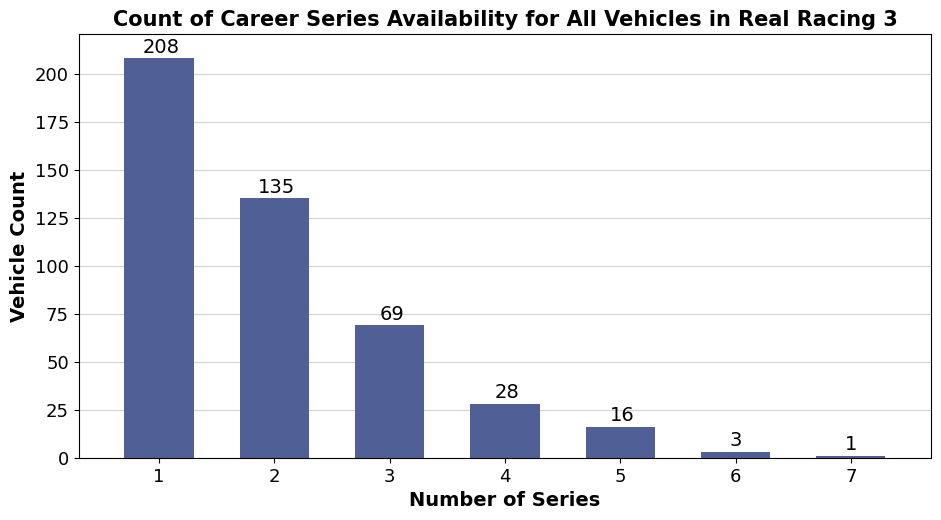

In [60]:
series_count = rr3_df.groupby('Series')['Model'].count()
plt.figure(figsize=(11,5.5))
plt.bar(range(1,8), series_count, color='#506096', width=0.6, zorder=2)
plt.title('Count of Career Series Availability for All Vehicles in Real Racing 3', fontsize=15, fontweight='bold')
plt.xlabel('Number of Series', fontsize=14, fontweight='bold')
plt.ylabel('Vehicle Count', fontsize=14, fontweight='bold')
for i in range(1,len(series_count)+1):
    if series_count[i] >= 100:   plt.text(i-0.14, series_count[i]+3, series_count[i], fontsize=14)
    elif series_count[i] >= 10:   plt.text(i-0.09, series_count[i]+3, series_count[i], fontsize=14)
    else:   plt.text(i-0.05, series_count[i]+3, series_count[i], fontsize=14)
plt.grid(axis='y', color='#d3d3d3', zorder=1)
plt.margins(0.06)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

With many settings for full proper visualization in the figure, here's the **bar chart**!

We can claim that **more than 300** vehicles can be driven in only **1 or 2 career series**. Are they worth buying and upgrading? Hmmm, maybe, if they also have their own **exclusive events**. By the way, the rest looks like more preferable to own and upgrade, though. Ah, if you ever wonder which vehicle has **7 different career series** for driving (and still single even in the latest version), check my 1st data analysis!

Unlike the previous revisions of the data analysis, it is nice to see that there is **no vehicle** not having any career series (sum these numbers above, it must match the total number). Some time ago, **F1 Academy Car** was found as the only one with no series, just the daily races in F1 section. Now, you are able to drive it through the **F1 Exhibition Events**, especially to get you prepared for more challenging events with real F1 cars.

### **OK, folks! That's enough for 2nd part of my Real Racing 3 data analysis!**

**I believe we have gained more knowledge on vehicles available in this game and hope that you enjoyed a lot! I promise that there will be lots of visualizations through in the next part of my analysis. You know any graph could explain a thousand words than the statements here, right?** 

# **Stay tuned and as always, keep racing!**